### Redes Convolucionais

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform, data
from scipy.signal import convolve


# https://scikit-image.org/

In [2]:
img = data.brick()

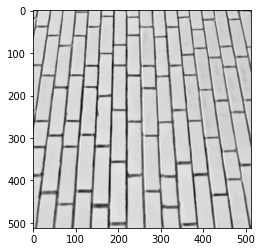

In [5]:
plt.imshow(img, cmap='Greys')

In [6]:
kernel_v = [
            [-1, 0, 1],
            [-1, 0, 1],
            [-1, 0, 1]            
           ]

kernel_h = [
            [-1, -1, -1],
            [ 0,  0,  0],
            [ 1,  1,  1]            
           ]

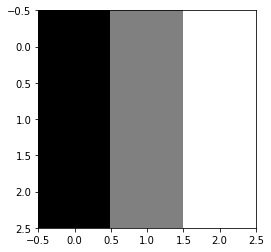

In [8]:
plt.imshow(kernel_v, cmap='gray')

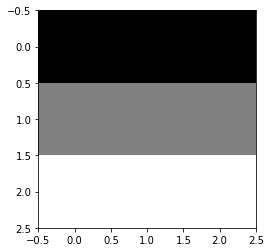

In [9]:
plt.imshow(kernel_h, cmap='gray')

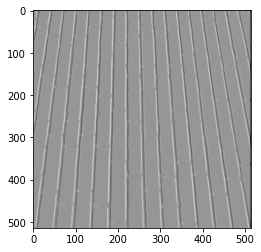

In [15]:
plt.figure()
resultado_v = convolve(img, kernel_v) 
plt.imshow(resultado_v, cmap='Greys')

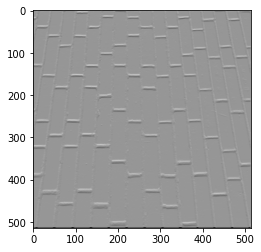

In [16]:
plt.figure()
resultado_h = convolve(img, kernel_h) 
plt.imshow(resultado_h, cmap='Greys')

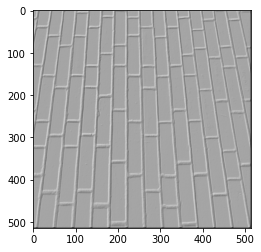

In [18]:
plt.figure()
resultado_vh = resultado_h + resultado_v
plt.imshow(resultado_vh, cmap='Greys')

In [41]:
lena = io.imread('lena.jpg')

In [42]:
img = lena[:, :,0]

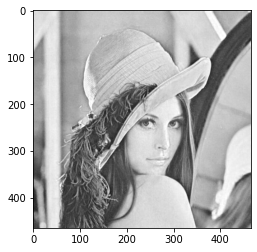

In [43]:
plt.imshow(img, cmap='gray')

**Kernel Media**

https://homepages.inf.ed.ac.uk/rbf/HIPR2/mean.htm

In [44]:
kernel_media = np.zeros((9,9))
kernel_media[:] = 1.0/(9**2)

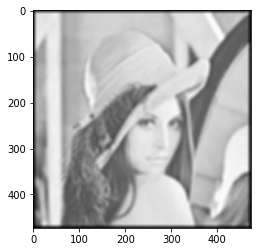

In [45]:
resultado_media = convolve(img, kernel_media) 
plt.imshow(resultado_media, cmap='gray')

**Filtro Sobel**

https://pt.wikipedia.org/wiki/Filtro_Sobel

In [46]:
sobel_v = np.zeros((3,3))
sobel_v[:, 0] = -1
sobel_v[:, 2] = 1
sobel_v[1, [0, 2]] = [-2, 2]
print(sobel_v)

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]


In [47]:
sobel_h = np.zeros((3,3))
sobel_h[0, :] = -1
sobel_h[2, :] = 1
sobel_h[[0, 2], 1] = [-2, 2]
print(sobel_h)

[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


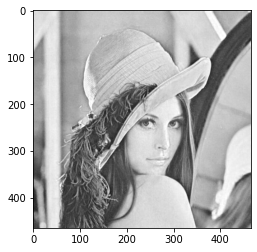

In [48]:
plt.imshow(img, cmap='gray')

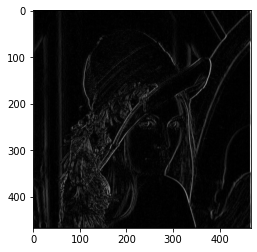

In [50]:
resultado = convolve(img, sobel_v) 
plt.imshow(np.abs(resultado), cmap='gray')

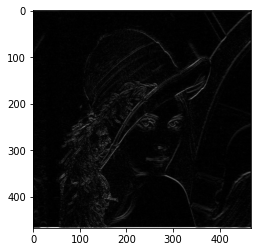

In [51]:
resultado = convolve(img, sobel_h) 
plt.imshow(np.abs(resultado), cmap='gray')

 - Laplace

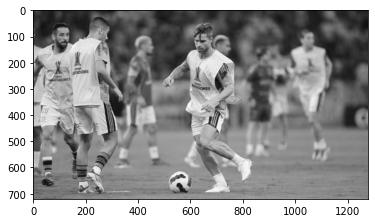

In [74]:
bola = io.imread('bola.jpg')
img = bola[:, :,0]
plt.imshow(img, cmap='gray')

In [55]:
import matplotlib.patches as patches

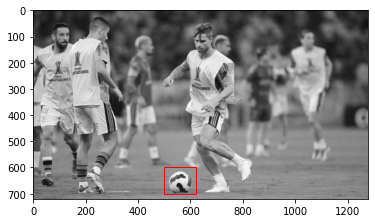

In [60]:
fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')

rectangle = [600, 700, 500, 620]

ax.add_patch(
    patches.Rectangle(
       (rectangle[2], rectangle[0]),
       rectangle[3] - rectangle[2],
       rectangle[1] - rectangle[0],
       color='red',
       fill=False 
    )
)

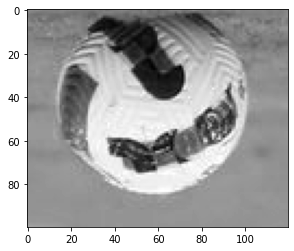

In [69]:
patch = img[rectangle[0]:rectangle[1], rectangle[2]:rectangle[3]]
patch = patch - patch.mean()
patch = np.flip(patch)
plt.imshow(patch, cmap='gray')

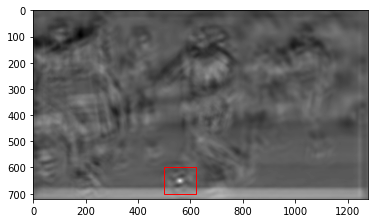

In [72]:
resultado = convolve(img, patch, mode='same') 
fig, ax = plt.subplots()
ax.imshow(resultado, cmap='gray')

rectangle = [600, 700, 500, 620]

ax.add_patch(
    patches.Rectangle(
       (rectangle[2], rectangle[0]),
       rectangle[3] - rectangle[2],
       rectangle[1] - rectangle[0],
       color='red',
       fill=False 
    )
)

- Onde está Wally?

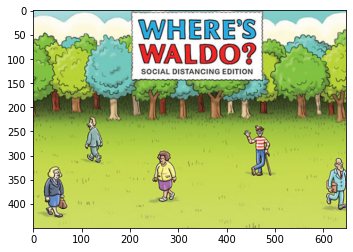

In [76]:
wally = io.imread('wally.png')
plt.imshow(wally)